In [41]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,10
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Задание

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

#### Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
    - a. Проверьте данные на пропуски. Удалите в случае обнаружения.
    - b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
    - a. Повторите п. 5 для полученной модели.
    - b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
    - a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
    - a. Сравните точность двух моделей.
    - b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

In [2]:
from sklearn.datasets import fetch_california_housing

c_h = fetch_california_housing(as_frame=True)

In [3]:
X = pd.DataFrame(c_h.data, columns=c_h.feature_names)

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
Y = pd.DataFrame(c_h.target, columns=['MedHouseVal'])

In [11]:
Y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [13]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


#### 2. Проведите первичный анализ.
- a. Проверьте данные на пропуски. Удалите в случае обнаружения.
- b.Нормализуйте один из признаков.

Ну, по поводу пропусков, все видно выше: их нет. А вот по поводу нормализации, логично сначала посмотреть, какой из признаков выбивается. И тут проще всего применрить серию boxplot:

<AxesSubplot:xlabel='variable', ylabel='value'>

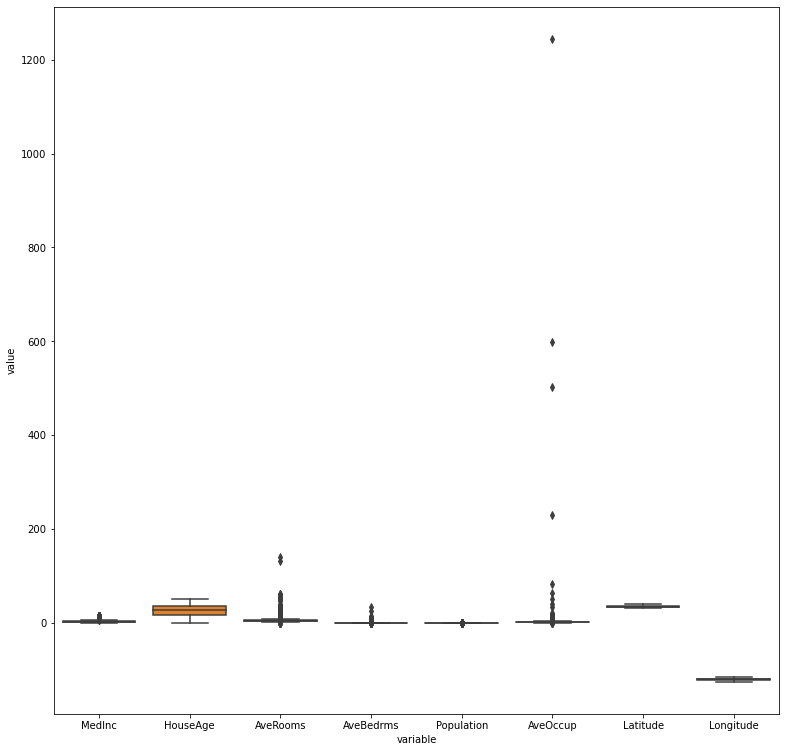

In [33]:
sns.boxplot(x="variable", y="value", data=pd.melt(X))

Нормализуем Population. Для нрмализации применим подход min-max scaling, поскольку при таком походе у нас не будет отрицательных значений (в таблице они отсутствуют):

In [28]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [30]:
for col in X.Population:
    X['Population'] = min_max_scaling(X['Population'])

In [32]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25


<AxesSubplot:xlabel='variable', ylabel='value'>

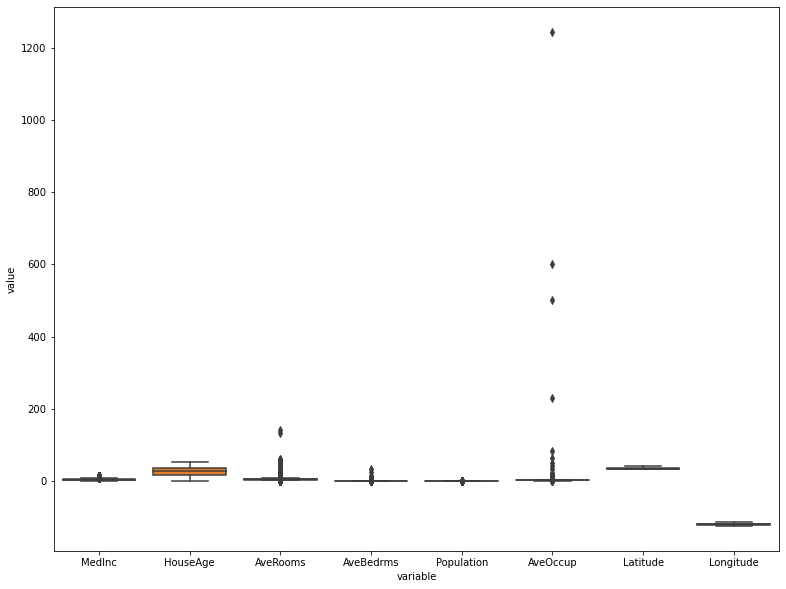

In [39]:
sns.boxplot(x="variable", y="value", data=pd.melt(X))

Стало не так страшно, хотя, до идеала далек. Хоть в задание это и не входит, но попробуем нормализовать весь дата фрейм:

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled, columns=X.columns)

In [36]:
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


<AxesSubplot:xlabel='variable', ylabel='value'>

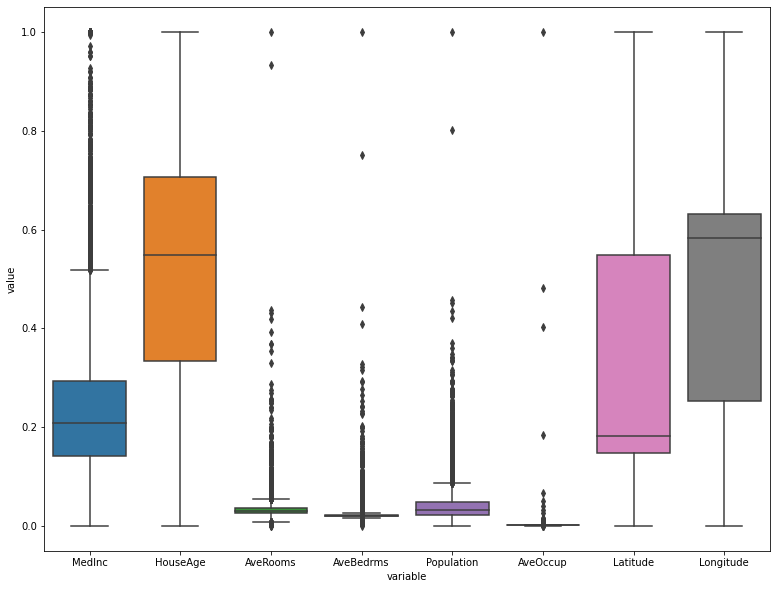

In [40]:
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df))

получилось интереснее. 

#### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### 4. Обучите модель регрессии на обучающем множестве.


In [43]:
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

LinearRegression()

#### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [92]:
model.score(X_test, y_test)

0.601385327205515

#### 6. Обучите дерево решений на обучающем множестве.
    - a. Повторите п. 5 для полученной модели.
    - b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.
#### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
    - a. Повторите п. 5 для полученной модели.

In [75]:
clf = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=10)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=10)

In [76]:
clf.score(X_test, y_test)

0.6094854552954491

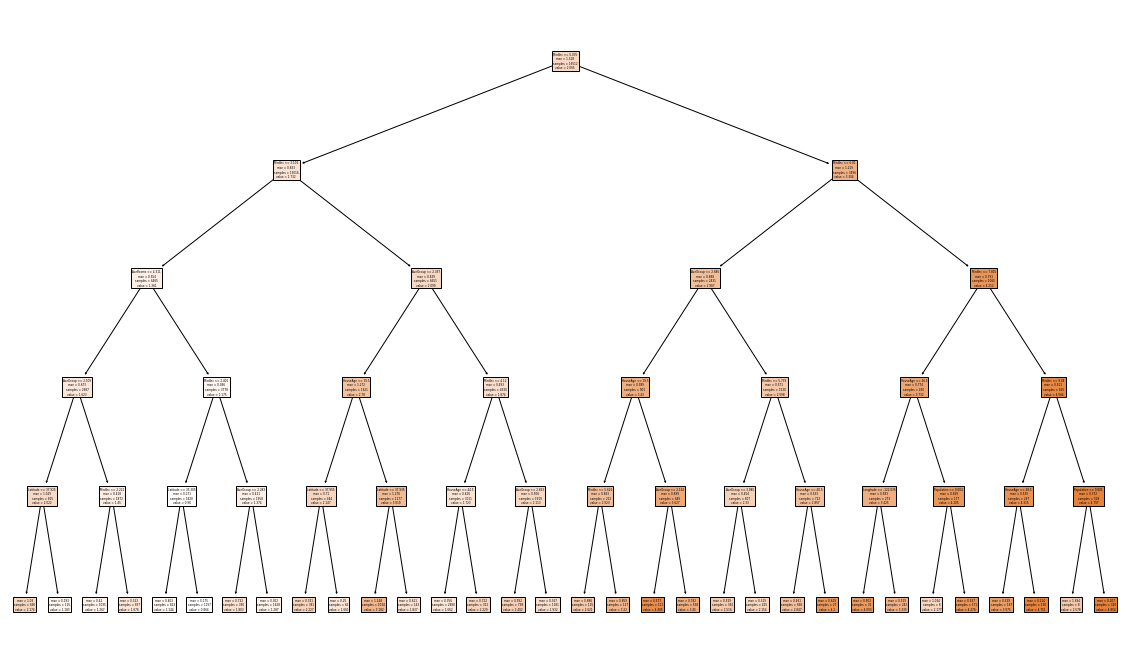

In [77]:
# from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X.columns, filled=True);

Веселенькое такое дерево получилось. Безусловно, картинка вообще не читабельна и надо делать либо меньше уровней, либо масштабируемую картинку, но в текущей модели количество уровней меньше 5 вообще дает отвратительное качество. 

Теперь хочу попробовать проделать все то же самое, но с нормализованным дата сетом

In [78]:
XX_train, XX_test, yy_train, yy_test = train_test_split(scaled_df, Y, test_size=0.2, random_state=2)

In [86]:
clf.fit(XX_train, yy_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=10)

In [87]:
clf.score(XX_test, yy_test)

0.6094854552954491

In [85]:
model.fit(XX_train, yy_train)
model.score(XX_test, yy_test)

0.6013853272055152

Изменений ноль. И вот это для меня остается загадкой.

### Выводы:

1. Пока мне кажется, что реально полезное применение Decision Tree (набор if else разной глубины) возможно только в нейронных сетях (возможно, в формате определения котика на картинке по составляющим самого котика: шерсть есть?, уши есть?, размеры и тп.).
2. Не понял как в итоге лучше всего определять, переобучилась модель, или нет? У вас в лекционном ноутбуке есть классный пример с визуализацией по графикам, где переобучение прям видно, но:
- там выборка достаточно простая и не очень большая;
- лично я не смог адаптировать код графиков под данную задачу, поскольку вылезала постоянно ошибка, что X и Y должны быть одного размера (но тут явно мойпайтон хромает на все полторы ноги);
- вообще говоря, на простых выборках визуализация - хороший способ отсечь переобучение, но что делать с большими и сложными датасетами? Как там бороться с переобучением и понимать, что в одном случае это не оно, а в другом (на одby уровень глубины больше, к примеру) - это уже вот прям оно?